## Week 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.

In [165]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", None],
    "Age": [24, 30, None, 22, 35],
    "Salary": [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Salary"].fillna(df["Salary"].median(), inplace=True)
df.dropna(subset=["Name"], inplace=True)
print("After cleaning:\n", df)

After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


/tmp/ipython-input-3027644318.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-3027644318.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [166]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    "Product": ["Laptop", "Laptop", "Desktop", "Tablet", "Tablet"],
    "Category": ["Electronics", "electronics", "Electronics", "Gadgets", "gadgets"]
}
df = pd.DataFrame(data)

# Standardize category values
df["Category"] = df["Category"].str.capitalize()
print("Standardized Data:\n", df)

Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.

## Homework for Students
- **Week 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

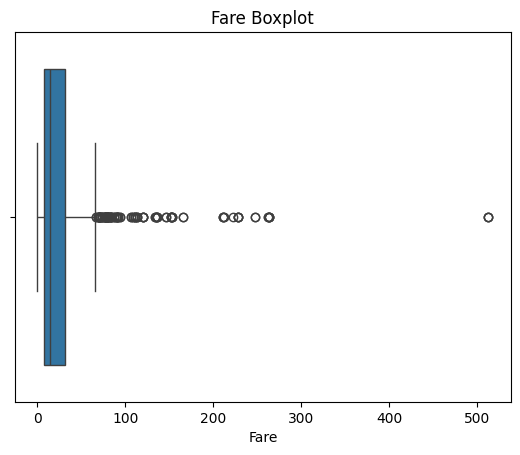

In [168]:
sns.boxplot(x=df["Fare"])
plt.title("Fare Boxplot")
plt.show()

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [170]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [171]:
# Implement data transformations to normalize numerical columns.
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df.drop(columns=["Cabin"], inplace=True)

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

/tmp/ipython-input-182875860.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-182875860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [172]:
# Standardize categorical columns and remove duplicates.
label = LabelEncoder()

df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

print(f"Number of duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicates: 0


In [173]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [174]:
print(df.head())

   PassengerId  Survived  Pclass  \
0     0.000000       0.0     1.0   
1     0.001124       1.0     0.0   
2     0.002247       1.0     1.0   
3     0.003371       1.0     0.0   
4     0.004494       0.0     1.0   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229  0.125   
2                             Heikkinen, Miss. Laina    0  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531  0.125   
4                           Allen, Mr. William Henry    1  0.434531  0.000   

   Parch            Ticket      Fare  Embarked  
0    0.0         A/5 21171  0.014151         2  
1    0.0          PC 17599  0.139136         0  
2    0.0  STON/O2. 3101282  0.015469         2  
3    0.0            113803  0.103644         2  
4    0.0            373450  0.015713         2  
